# Домашнее задание №4

In [ ]:
#Прелюдия. Скачиваю нужные данные.

import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


## Задание №1

#### 1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
#### 2. (1)Очистите текст от пунктуации, (2)приведите его к нижнему регистру, (3)лемматизируйте и (4)запишите в новый файл.

In [3]:
#Скачан английский текст первой книги о Гарри Поттере.

import os, re

with open("Harry_Potter_and_the_Sorcerers_Stone.txt", "r", encoding="utf-8") as i: #Открываю файлы для чтения
        harry = i.read()                                                           #Читаем файлы
        
#(1)
harry_new = [w.strip("’!\"#$%&'()*+,./:;<=>?@[\]^_`{|}~„“”«»*—/\-”.!,?—?,") for w in harry.split()] #Убираю пунктуацию «вручную», потому что в тексте есть кавычки-«елочки», которых нет в punctuation
harry_new = [k for k in harry_new if len(k) != 0]                                                  #Удаляю пустые элементы 

harry_new[:10] #Проверка раз

['CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', 'and', 'Mrs', 'Dursley']

In [4]:
#(2)
harry_new = " ".join(harry_new).lower() #Привожу текст к нижнему регистру
harry_new[:11]                          #Проверка два

'chapter one'

In [5]:
#(3) 
from nltk.tokenize import word_tokenize
harry_new2 = word_tokenize(harry_new)   #Разбиваю на слова токенизатором из NLTK

In [6]:
#(3)продолжение
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()

harrylem = wnl.lemmatize(" ".join(harry_new2)) #Лемматизирую
harrylem[:200]                                 #Проверка три

"chapter one the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you 'd expect to be involve"

In [7]:
#(4)
with open("harry_upd.txt", "a+", encoding="utf-8") as k:  #Создаю новый файл и открываю его для добавления и чтения
    k.write(harrylem)                                     #Записываю лемматизированный текст в новый файл

#### 2. (5)Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте — 2 и т.д.

In [73]:
#Сейчас я буду проверять закон Ципфа. Для этого я сначала...

#Удалю стоп-слова (потому что зачем их учитывать. в данном случае, полагаю, это не то чтобы критично, но почему бы их не удалить)
from nltk.corpus import stopwords                                     #Перед этим скачиваю пакет stopwords 
stop = stopwords.words("english")                                     #Стоп-слова должны быть для английского языка
harry_nostwr = [w for w in word_tokenize(harrylem) if w not in stop]  #В новый список все, кроме стоп-слов
harry_str = " ".join(harry_nostwr)                                    #Объединяю в строку

#Сначала считаю абсолютную частоту
from collections import Counter
harry_fr = {}                           #Создаю словарь, где все это будет храниться
counts = Counter(harry_nostwr)         #Отсортированный по частотности список

for k, v in counts.items():             #Абсолютная частота
    harry_fr[k] = v

#Теперь относительную
dlina = len(harry_str.split())          #Считаю длину текста
for w, zn in harry_fr.items():          #Достаю пары ключей и значений
    otn_fr = zn/dlina                   #Делю значения на количество слов, получается относительная частота

In [37]:
#Теперь закон Ципфа

import matplotlib
import matplotlib.pyplot as plt

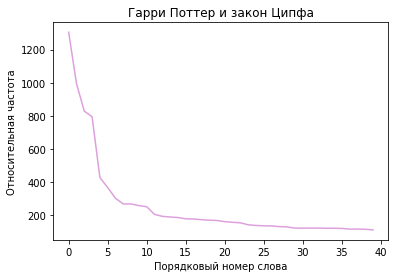

In [75]:
x = range(40)
y = []              #Создаю список

harry_sort = sorted(harry_fr.items(), key=lambda x: x[1], reverse=True) #Сортирую по частоте с лямбдой
for word in harry_sort:
    otn_fr = word[1]
    y.append(otn_fr)                                                    #Засовываю в список оотносительную частоту
    
plt.plot(x, y[:40], c="plum")                                           #Это у меня с 50 на 50 не работало, а с 40 на 40 работает
plt.title("Гарри Поттер и закон Ципфа")
plt.xlabel("Порядковый номер слова")
plt.ylabel("Относительная частота")
plt.show()


#щас сдохну

#### 3. (1)Очистите текст от стоп-слов. (2)Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

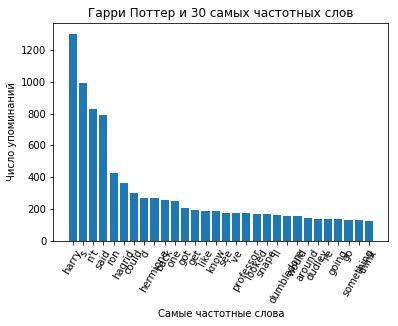

In [82]:
#3(1)Я очень умная и зачем-то это уже сделала ¯\_(ツ)_/¯

#(2)
x = range(30)
y = [w[1] for w in harry_sort]    #Здесь я вытаскиваю число
z = [w[0] for w in harry_sort]    #А здесь я вытаскиваю слова

plt.bar(x, y[:30])
plt.title("Гарри Поттер и 30 самых частотных слов")
plt.xticks(x, z[:30], rotation=60)     #А здесь я пишу, че где и делаю диагональный наклон слов.
plt.ylabel("Число упоминаний")
plt.xlabel("Самые частотные слова")
plt.show()